In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import scipy
from celluloid import Camera

import Classroom


Bad key "text.kerning_factor" on line 4 in
/Users/tylerkeeling/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


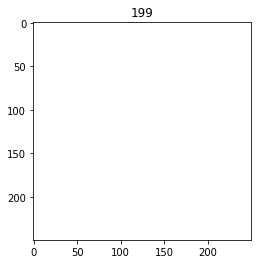

In [2]:
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

c = Classroom.classroom(250,250,0.1,1)

fig, ax = plt.subplots()
# im = ax.imshow(c.arr)

camera = Camera(fig)
for i in range(200):
    ax.imshow(c.arr)
    # title = i
    ax.set_title(i)
    c.iterate()
    camera.snap()
    
animation = camera.animate()
animation.save('banimate.gif', writer = 'imagemagick', fps=30)

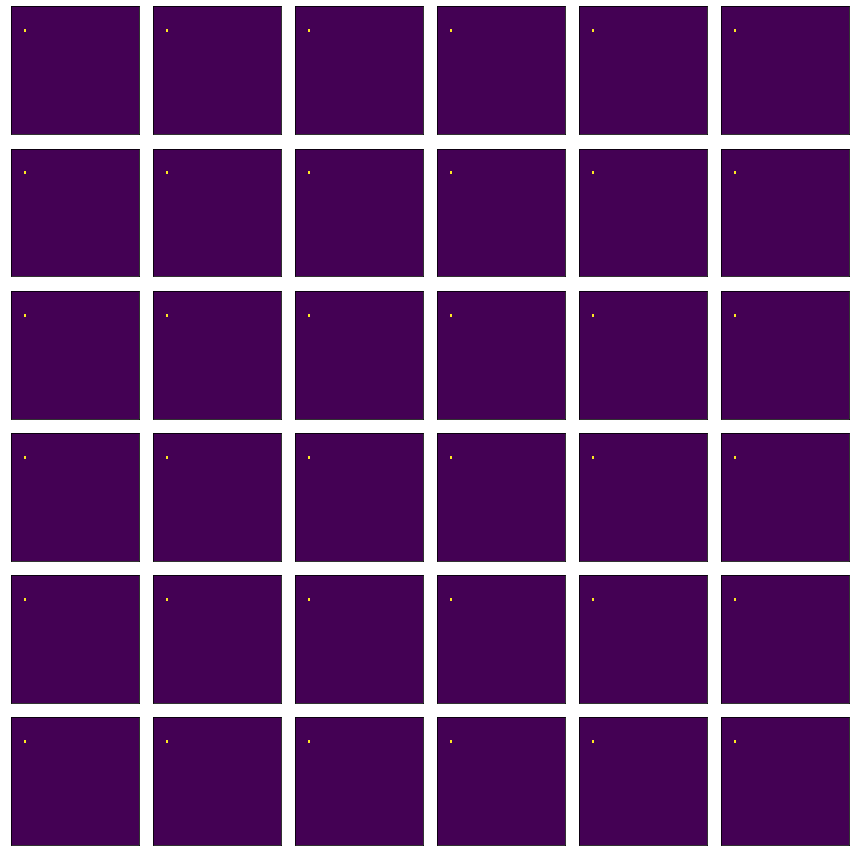

In [25]:
def plot_image(img, title):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

num_rows = 6 # i 
num_cols = 6 # multiple of 4 + 1 
startpoint = 0

plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(0, num_rows*num_cols, num_cols):
    for j in range(num_cols):
        plt.subplot(num_rows, num_cols, i+j+1) # 1 indexing
        plot_image(c.arr, "Heatmap")
    
plt.tight_layout()
plt.show()



#### Was hoping below would be faster by using "blit" flag but this is raising an error. Interesting. 
https://stackoverflow.com/questions/33742845/how-to-animate-a-seaborns-heatmap-or-correlation-matrix


import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def animate_heat_map():
    fig = plt.figure()

    nx = ny = 20
    data = np.random.rand(nx, ny)
    ax = sns.heatmap(data, vmin=0, vmax=1)

    def init():
        plt.clf()
        ax = sns.heatmap(data, vmin=0, vmax=1)

    def animate(i):
        plt.clf()
        data = np.random.rand(nx, ny)
        ax = sns.heatmap(data, vmin=0, vmax=1)

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=1000)
    anim.save('double_pendulum.gif', fps=15)
    plt.show()


if __name__ == "__main__":
    animate_heat_map()